Mounting Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installing Packages

In [2]:
pip install soundfile

In [3]:
pip install numpy

Importing Libraries

In [4]:
import soundfile # to read audio file
import numpy as np
import librosa # to extract speech features
import glob
import os
import pickle # to save model after training
from sklearn.model_selection import train_test_split # for splitting training and testing
from sklearn.neural_network import MLPClassifier # multi-layer perceptron model
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
import glob
from scipy.io.wavfile import read
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

Feature Extraction process - Data Pre-Processing

In [5]:
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate   
        #samplerate = sample_rate
        #print(samplerate)
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

All emotions in the data




In [6]:
emotions = {
    "amused": "amused",
    "anger": "anger",
    "Disgust": "Disgust",
    "neutral": "neutral",
    "sleepiness": "sleepiness",
}

Labelling data (Only these emotions are allowed)

In [7]:
observed_emotions = ['amused','anger','Disgust','sleepiness','neutral']

In [8]:
ls -l

total 8
drwx------ 5 root root 4096 Jan 10 17:57 drive/
drwxr-xr-x 1 root root 4096 Jan  6 18:10 sample_data/


Load the data and extract features for each sound file

In [9]:
x,y=[],[]
#DataFlair - Load the data and extract features for each sound file
#def load_data(test_size=0.2):
    
for file in glob.glob("/content/drive/MyDrive/PythonCode/*/*.wav"):
        file_name=os.path.basename(file)
       
        #audio = len(file_name)
        print(file_name)

        emotion=emotions[file_name.split("_")[0]]
        print(emotion)
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        #print(audio)
        x.append(feature)
        y.append(emotion)


Streaming output truncated to the last 5000 lines.
sleepiness_393-420_0407_bea.wav
sleepiness
sleepiness_393-420_0403_bea.wav
sleepiness
sleepiness_393-420_bea.wav
sleepiness
sleepiness_393-420_0393_bea.wav
sleepiness
sleepiness_393-420_0402_bea.wav
sleepiness
sleepiness_393-420_0398_bea.wav
sleepiness
sleepiness_393-420_0397_bea.wav
sleepiness
sleepiness_393-420_0406_bea.wav
sleepiness
sleepiness_393-420_0400_bea.wav
sleepiness
sleepiness_393-420_0395_bea.wav
sleepiness
sleepiness_393-420_0404_bea.wav
sleepiness
sleepiness_393-420_0394_bea.wav
sleepiness
sleepiness_393-420_0409_bea.wav
sleepiness
sleepiness_393-420_0399_bea.wav
sleepiness
sleepiness_393-420_0401_bea.wav
sleepiness
sleepiness_393-420_0408_bea.wav
sleepiness
sleepiness_393-420_0396_bea.wav
sleepiness
sleepiness_393-420_0416_bea.wav
sleepiness
sleepiness_393-420_0418_bea.wav
sleepiness
sleepiness_393-420_0420_bea.wav
sleepiness
sleepiness_393-420_0413_bea.wav
sleepiness
sleepiness_393-420_0412_bea.wav
sleepiness
sleepine

In [10]:
y = np.array(y)
x = np.array(x)

Use of stratifiedkfold method to split the train and test data

In [11]:
xxx = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=12)
xxx.get_n_splits(x, y)


5

Train and Test data

In [12]:
for train_index, test_index in xxx.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train,x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1296 3345 5307 ... 3449 2612  504] TEST: [ 596   90 2843 ... 2989 5964  287]
TRAIN: [ 122 5171 6356 ... 3036 6082 1952] TEST: [4313 2148 3898 ... 3264 4370 1267]
TRAIN: [3205  639 3912 ... 2614 3125 6114] TEST: [4058 6614 1759 ... 4660 1822 3020]
TRAIN: [5767 4542 6533 ... 5960 2181  331] TEST: [4568 4155  420 ... 5314 5760 3752]
TRAIN: [3783 3937 5413 ... 5366 3164 5304] TEST: [3156  455 3703 ...  286 2883 1685]


In [13]:
#DataFlair - Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

(4982, 1661)
Features extracted: 180


Support Vector Machine Classifier

In [14]:
#Create a svm Classifier
model1 = svm.SVC(kernel='linear', C=1, random_state=12) # Linear Kernel

scores1 = cross_val_score(model1, x, y, scoring = 'accuracy', cv = xxx, n_jobs = -1)

#Train the model using the training sets
model1.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model1.predict(x_test)

Accuracy of SVM model

In [15]:
# Model Accuracy: how often is the classifier correct?
print('SVM accuracy: %.1f%% +/-(%.3f)' % (np.mean(scores1*100), np.std(scores1)))

SVM accuracy: 89.6% +/-(0.001)


Precision of model

In [16]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision Score : ",metrics.precision_score(y_test, y_pred, average='micro'))

Precision Score :  0.8976520168573149


Recall of model

In [17]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'micro'))

Recall: 0.8976520168573149


Matrix:  [[156   7   0   4   4]
 [ 15 280  29   5   3]
 [  0  24 301   1   0]
 [ 21   9   1 359   6]
 [ 10  11   1  19 395]]


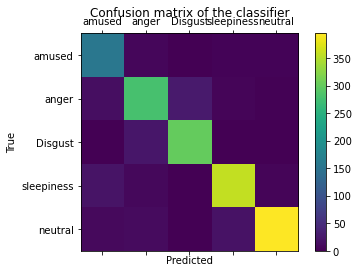

In [18]:
matrix = confusion_matrix(y_test,y_pred)
print("Matrix: ", matrix)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + observed_emotions)
ax.set_yticklabels([''] + observed_emotions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

RandomForest Algorithm

In [19]:
#Create a Gaussian Classifier
model2=RandomForestClassifier(n_estimators=100)
scores2 = cross_val_score(model2, x, y, scoring = 'accuracy', cv = xxx, n_jobs = -1)

#Train the model using the training sets y_pred=clf.predict(X_test)
model2.fit(x_train,y_train)

y_pred=model2.predict(x_test)

Accuracy, Precision, Recall of model

In [20]:
# Model Accuracy, how often is the classifier correct?
print('Random Forest Classifier accuracy: %.1f%% +/-(%.3f)' % (np.mean(scores2*100), np.std(scores2)))

Random Forest Classifier accuracy: 93.0% +/-(0.006)


In [21]:
# Model Precision: 
print("Precision Score : ",metrics.precision_score(y_test, y_pred, average='micro'))

Precision Score :  0.9349789283564118


In [22]:
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'micro'))

Recall: 0.9349789283564118


Use of k-nearest neighbour classifier

In [23]:
model3 = KNeighborsClassifier(n_neighbors=5) # k = 7
scores3 = cross_val_score(model3, x, y, scoring = 'accuracy', cv = xxx, n_jobs = -1)

model3.fit(x_train, y_train) 

y_pred = model3.predict(x_test)  

Find of Accuracy, Recall and Precision

In [24]:
# Calculate the accuracy of the model 
print('KNN accuracy: %.1f%% +/-(%.3f)' % (np.mean(scores3*100), np.std(scores3)))

KNN accuracy: 85.1% +/-(0.004)


In [25]:
print("Precision Score : ",metrics.precision_score(y_test, y_pred, average='micro'))

Precision Score :  0.8567128236002408


In [26]:
print("Recall:",metrics.recall_score(y_test, y_pred, average = 'micro'))

Recall: 0.8567128236002408


Statistical Testing

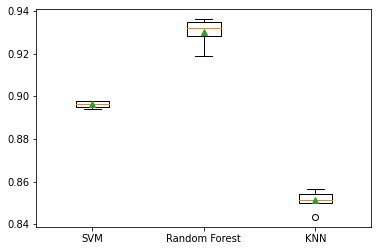

In [27]:
plt.boxplot([scores1, scores2, scores3], labels=['SVM', 'Random Forest', 'KNN'], showmeans=True)
plt.show()

Comparative statistical testing between Support vector machine and Random Forest algorithm

In [28]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, 
                          estimator2=model2, 
                          #estimator3=model2,
                          #estimator4=model3,
                          X=x, 
                          y=y, 
                          scoring='accuracy', 
                          random_seed=1)
# summarize
print(f'The P-value is = {p:.3f}')
print(f'The t-statistics is = {t:.3f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')
    

The P-value is = 0.001
The t-statistics is = -7.534
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.


Comparative statistical testing between Random Forest algorithm and K-nearest neighbour algorithm

In [29]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model2, 
                          estimator2=model3, 
                          X=x, 
                          y=y, 
                          scoring='accuracy', 
                          random_seed=1)
# summarize
print(f'The P-value is = {p:.5f}')
print(f'The t-statistics is = {t:.5f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')
    

The P-value is = 0.00001
The t-statistics is = 16.63019
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.


Comparative statistical testing between support vector machine algorithm and K-nearest neighbour algorithm

In [31]:
from mlxtend.evaluate import paired_ttest_5x2cv
# check if difference between algorithms is real
t, p = paired_ttest_5x2cv(estimator1=model1, 
                          estimator2=model3, 
                          X=x, 
                          y=y, 
                          scoring='accuracy', 
                          random_seed=1)
# summarize
print(f'The P-value is = {p:.5f}')
print(f'The t-statistics is = {t:.5f}')
# interpret the result
if p <= 0.05:
    print('Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.')
else:
    print('Since p>0.05, we cannot reject the null hypothesis and may conclude that the performance of the two algorithms is not significantly different.')

The P-value is = 0.00054
The t-statistics is = 7.84089
Since p<0.05, We can reject the null-hypothesis that both models perform equally well on this dataset. We may conclude that the two algorithms are significantly different.


Deployment using Random Forest Algorithm using Testing Data to evaluate prediction of emotions

In [30]:
audio_path = "/content/drive/MyDrive/Testing Data/anger_1-28_0005_bea.wav"


def predict_proba(self, audio_path):
        """
        Predicts the probability of each emotion.
        """
        #if self.classification:
feature = extract_feature(audio_path,mfcc = 'true', chroma = 'true', mel = 'true' ).reshape(1, -1)
proba = (feature)[0]
print(proba)
result = {}
print(model2.classes_)
for observed_emotions, prob in zip(model2.classes_, proba):
        result[observed_emotions] = prob
print(result)
    #return (result)
#from sklearn.svm import SVC
def predict(self, audio_path):
        """
        given an `audio_path`, this method extracts the features
        and predicts the emotion
        """
        feature = extract_feature(audio_path, **self.audio_config).reshape(1, -1)
        return self.model2.predict(feature)[0]
print(model2.predict(feature)[0])

[-3.65024929e+02  6.72138199e+01 -2.08401755e-01 -6.69274397e-01
 -2.45307592e+00  1.33245276e+00  4.79567683e-01 -8.29519013e-01
  4.14883051e-01 -7.66396650e+00 -3.34572505e-02 -3.05999399e+00
 -5.77346873e+00  3.67327558e-01  4.32812483e+00  4.08333111e+00
  1.00309418e+01  4.96006684e+00  7.74541263e+00  7.69495335e+00
  8.14312735e+00  6.87129385e+00  1.79675352e+00  1.45364191e+00
 -8.30389454e-01 -2.33849180e+00  5.06798759e-01 -9.44895775e-01
 -8.05029577e-01  3.11971955e+00  1.62006552e+00  4.10325530e+00
  7.41110677e+00  6.45491578e+00  4.23622335e+00  2.49544669e+00
  1.78493527e+00  4.12317338e+00  3.34072691e+00  3.13574729e+00
  7.28979599e-01  6.48205820e-01  5.83823212e-01  5.60417819e-01
  5.24936159e-01  4.94833215e-01  4.45657219e-01  4.99611482e-01
  5.85283962e-01  6.46098575e-01  6.30790901e-01  6.74621646e-01
  1.09917600e-01  1.62357369e-02  2.88973396e-03  2.33403896e-03
  1.09134607e-02  1.25505195e-01  1.10291163e+00  2.89777701e+00
  1.51158534e+00  3.48244